<a href="https://colab.research.google.com/github/jordan-palmer/FlameNEST_examples/blob/main/FlameNEST_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simple Example
This notebook aims to demonstrate the core concept of FlameNEST in the most basic way. Take a basic simulation where the some number of photons, $N$, are samples from a Poisson distribution then smeared by a Gaussian to obtain some signal, $S$. i.e \


$N \sim Poisson(\lambda = 50)$\
$S \sim Gaussian(\mu = N,\sigma = 0.1 \sqrt{N})$


We know could run many simulations of this type and evaluate the probability density, $P(s)$, at each observed signal, $s$. Or, we could evaluate the $P(s)$ directly for each $s$ by using the following relation \


$P(s) = \sum_{n} P(s|n)P(n) = Gaussian(x=s-n, 0.1\sqrt{n})*Poisson(n|\lambda)$


This is precisely what FlameNEST does which requires no MC simulations and allows us to determine $P(s)$ for every observed $s$. 
_____
No GPU is needed.

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [12]:
def PDF(s):
  """ PDF
  input: signal, s
  output: probability density as signal s
  This function demonstrates the core concept of FlameNEST
  lambda = 50, for this simple example
  """
  lambda_ = 50
  def Poisson__(n,lambda_):
      return (lambda_**n * np.exp(-1*lambda_))/math.factorial(n)
  def Gaussian__(s,n):
      sigma = 0.1*np.sqrt(n)
      return (np.exp((-1*(s-n)**2)/(2*(sigma)**2))/np.sqrt(2*np.pi*sigma**2))
  prob = 0
  for i in range(100):
      j = i+1
      prob += Gaussian__(s,j)*Poisson__(j,lambda_)
      #out += binom__(s,0.2,1)*Poisson__(j,lambda_)
  return prob 

In [13]:
def MCSim(lambda_=50):
  """ MC Sim
  input: lambda_ = 50
  output: one simulation result
  This function demonstrates a simple MC simulation
  """
  data_poisson = scipy.stats.poisson.rvs(mu=lambda_, size=1)
  data_norm = scipy.stats.norm.rvs(size=1,loc=data_poisson,scale=0.1*np.sqrt(data_poisson))
  return data_norm

Run a bunch of MC simulations and append the signal to a list



In [15]:
mc = []
for i in range(100000):
    mc.append(MCSim())
mc = np.concatenate(mc).ravel()

Evaluate the P(s) for a range of n




In [18]:
signals = np.linspace(20,80,1000,dtype='int') #we know a priori what range of n produces non-zero probability of producing a signal, s
output = []
for signal in signals:
    output.append(PDF(signal))

Let's compare to convince ourselves that these are equivalent

Text(0, 0.5, 'Probability')

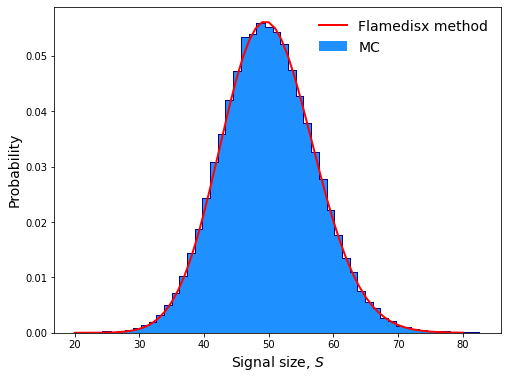

In [19]:
plt.figure(figsize=(8,6))
plt.plot(signals,np.asarray(output),color='r',linewidth=2,label='Flamedisx method')
plt.hist(mc,bins=50,density=True,color='darkblue',histtype='step',linewidth=2)
plt.hist(mc,bins=50,density=True,color='dodgerblue',label='MC',histtype='stepfilled')
plt.legend(fontsize=14,frameon=False)
plt.xlabel(r'Signal size, $S$',fontsize=14)
plt.ylabel('Probability',fontsize=14)